In [26]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'plantdisease:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F70909%2F150545%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240416%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240416T083041Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3De678e5763d586a47d0cdd9a3f770c8729fb692b468e1bb456a1178dba96a192bb45a7c06991da861dee1896d065130d02c2b7d61fd8fe38433880ab44526370d807cc28445011562096ae1e38418bebd540d800c729a0243339f47f4f7d941187e6c191b2e2cbe77d1da709cf1ca8b659f8bca860657d92cfc090358cd5ccec5143ea5d7b11f7b996820f2263cba7a0b2f9694cb64832cc84718d66e198b7e48787faee4e43ce166f287ca54f82e12ba5469eb96872ab98241c20d08cd99f5d7c6766c6d53b3be0e6ecdf3abe46ff50fb3e4c84bae0a7b5b157ef7df19ad3127e930ae7fad25b522825052ba1feeef9152523b91c91ffb369d072569e2f556df'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 689512690 bytes downloaded
Downloaded and uncompressed: plantdisease
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(
            os.path.join(dirname, filename)#)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Load Data

In [7]:
filepath = "../input/plantdisease/PlantVillage/"
random_seed = 101
categories = os.listdir(filepath)
print("All the class labels:- ",categories,"\n\nNo. of categories = ", len(categories))

All the class labels:-  ['Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Potato___Early_blight', 'Potato___Late_blight', 'Tomato_Late_blight', 'Pepper__bell___healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Pepper__bell___Bacterial_spot', 'Tomato_healthy', 'Potato___healthy', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Leaf_Mold', 'Tomato_Early_blight'] 

No. of categories =  15


# Printing all the class labels and Number of categories

In [8]:
print("Class labels: {}\n\nNumber of categories: {}".format(categories, len(categories)))

Class labels: ['Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Potato___Early_blight', 'Potato___Late_blight', 'Tomato_Late_blight', 'Pepper__bell___healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Pepper__bell___Bacterial_spot', 'Tomato_healthy', 'Potato___healthy', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Leaf_Mold', 'Tomato_Early_blight']

Number of categories: 15


# Data Exploring

In [9]:
def load_images_and_labels(categories, filepath, max_images_per_category=300, target_size=(227, 227)):
    img_lst = []
    labels = []
    for index, category in enumerate(categories):
        category_path = os.path.join(filepath, category)
        if not os.path.isdir(category_path):
            continue
        count = 0
        for image_name in os.listdir(category_path):
            if count >= max_images_per_category:
                break
            file_ext = image_name.split(".")[-1].lower()
            if file_ext in ["jpg", "jpeg"]:
                image_path = os.path.join(category_path, image_name)
                try:
                    img = cv2.imread(image_path)
                    if img is None:
                        continue
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img_array = Image.fromarray(img, 'RGB')
                    resized_img = img_array.resize(target_size)
                    img_lst.append(np.array(resized_img))
                    labels.append(index)
                    count += 1
                except Exception as e:
                    print(f"Error processing image: {image_path} - {e}")
    return img_lst, labels

images, labels = load_images_and_labels(categories, filepath)
print("Number of images loaded:", len(images))
print("Number of labels loaded:", len(labels))
print("Data types:", type(images), type(labels))

Number of images loaded: 4352
Number of labels loaded: 4352
Data types: <class 'list'> <class 'list'>


In [10]:
# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print shapes
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

# Print data types
print("Data types:", type(images), type(labels))

Images shape: (4352, 227, 227, 3)
Labels shape: (4352,)
Data types: <class 'numpy.ndarray'> <class 'numpy.ndarray'>


# Method to Display random images with labels from the dataset

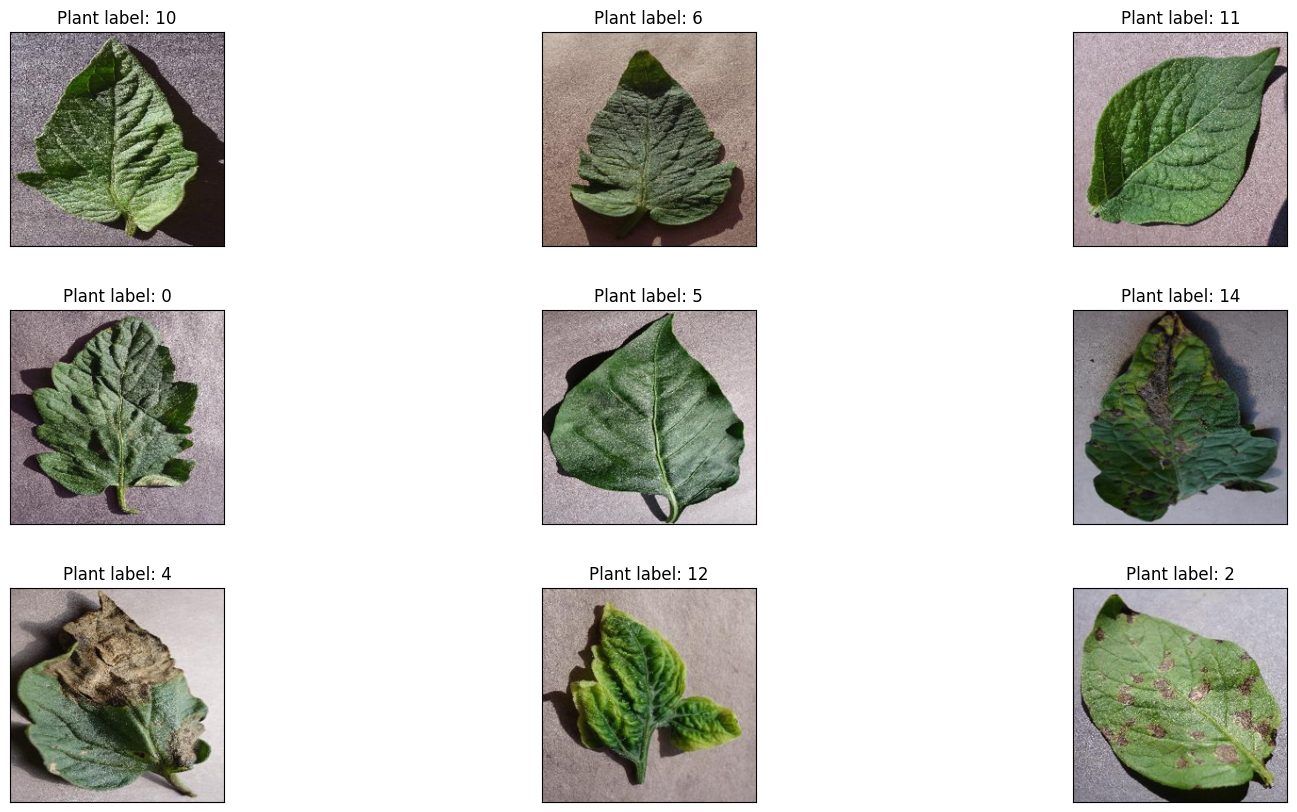

In [11]:
def display_random_images_with_labels(images, labels, num_rows=3, num_cols=3):
    plt.figure(figsize=(19, 10))
    for i, _ in enumerate(range(num_rows * num_cols)):
        r = np.random.randint(0, images.shape[0])

        plt.subplot(num_rows, num_cols, i + 1)
        plt.subplots_adjust(hspace=0.3, wspace=0.3)
        plt.imshow(images[r])

        plt.title('Plant label: {}'.format(labels[r]))
        plt.xticks([])
        plt.yticks([])

    plt.show()

display_random_images_with_labels(images, labels)

## Mixing up the data to train the CNN

In [12]:
# Step 1: Shuffle the indices for data shuffling

# Get equally spaced indices in the range of the number of images
indices = np.arange(images.shape[0])
print("Indices before shuffling:", indices)

# Shuffle the indices randomly
np.random.seed(random_seed)
np.random.shuffle(indices)
print("Indices after shuffling:", indices)

Indices before shuffling: [   0    1    2 ... 4349 4350 4351]
Indices after shuffling: [3591 1775 3666 ...  599 1361 1547]


In [13]:
# Step 2: Shuffle the images and corresponding labels

# Shuffle images and corresponding labels simultaneously using shuffled indices
images = images[indices]
labels = labels[indices]

# Print the shapes of shuffled images and labels
print("Images shape after shuffling:", images.shape)
print("Labels shape after shuffling:", labels.shape)

Images shape after shuffling: (4352, 227, 227, 3)
Labels shape after shuffling: (4352,)


# Display random images with labels after Normalizing the data

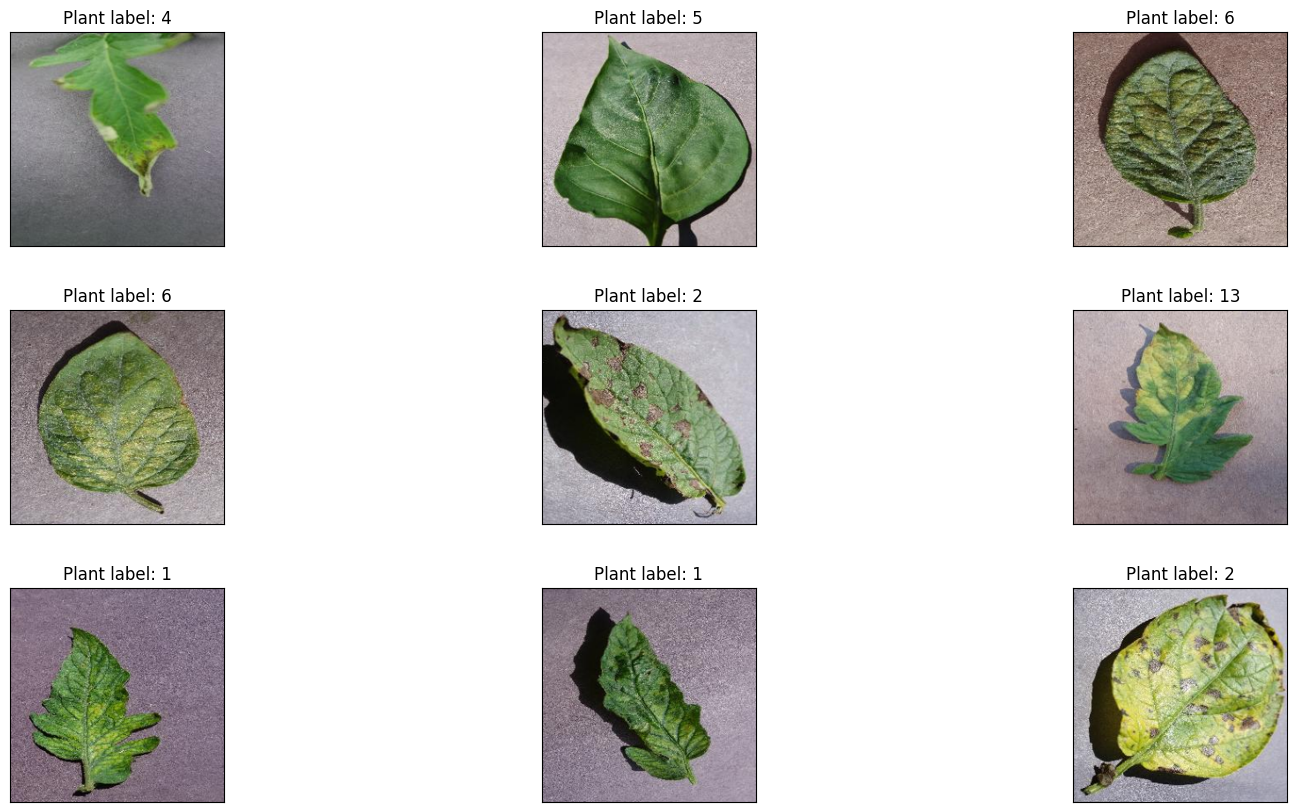

In [14]:
display_random_images_with_labels(images, labels)

# Spliting the dataset for training and testing

In [15]:
def train_test_split(data, labels, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    indices = np.arange(len(data))
    np.random.shuffle(indices)

    split_index = int(len(data) * (1 - test_size))

    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    X_train, y_train = data[train_indices], labels[train_indices]
    X_test, y_test = data[test_indices], labels[test_indices]

    return X_train, X_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (3481, 227, 227, 3)
y_train shape =  (3481,)

x_test shape =  (871, 227, 227, 3)
y_test shape =  (871,)


# Display random images with labels from the training data

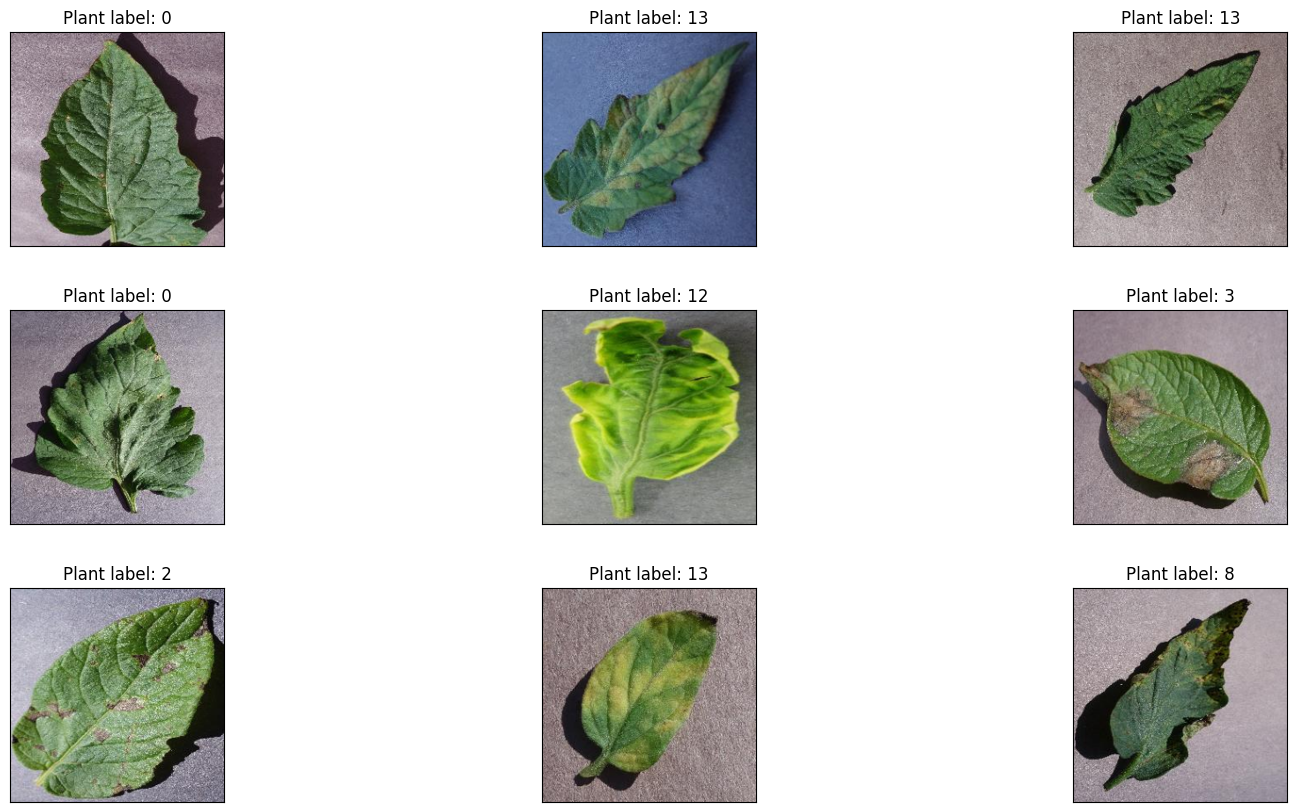

In [16]:
display_random_images_with_labels(x_train, y_train)

# Define NN model

In [21]:
class Conv2D:
    def __init__(self, num_filters, kernel_size, stride, padding):
        self.num_filters = num_filters
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.filters = np.random.randn(num_filters, kernel_size[0], kernel_size[1], 3) / np.sqrt(kernel_size[0] * kernel_size[1] * 3)

    def iterate_regions(self, image):
        h, w, _ = image.shape

        for i in range(0, h - self.kernel_size[0] + 1, self.stride[0]):
            for j in range(0, w - self.kernel_size[1] + 1, self.stride[1]):
                im_region = image[i:(i + self.kernel_size[0]), j:(j + self.kernel_size[1])]
                yield im_region, i, j

    def forward(self, input):
        self.last_input = input
        h, w, _ = input.shape
        output_h = (h - self.kernel_size[0]) // self.stride[0] + 1
        output_w = (w - self.kernel_size[1]) // self.stride[1] + 1
        output = np.zeros((output_h, output_w, self.num_filters))

        for im_region, i, j in self.iterate_regions(input):
            output[i // self.stride[0], j // self.stride[1]] = np.sum(im_region * self.filters, axis=(0, 1, 2))

        return output

class MaxPooling2D:
    def __init__(self, pool_size, stride):
        self.pool_size = pool_size
        self.stride = stride

    def iterate_regions(self, image):
        h, w, _ = image.shape

        for i in range(0, h - self.pool_size[0] + 1, self.stride[0]):
            for j in range(0, w - self.pool_size[1] + 1, self.stride[1]):
                im_region = image[i:(i + self.pool_size[0]), j:(j + self.pool_size[1])]
                yield im_region, i, j

    def forward(self, input):
        self.last_input = input
        h, w, _ = input.shape
        output_h = (h - self.pool_size[0]) // self.stride[0] + 1
        output_w = (w - self.pool_size[1]) // self.stride[1] + 1
        output = np.zeros((output_h, output_w, 3))

        for im_region, i, j in self.iterate_regions(input):
            output[i // self.stride[0], j // self.stride[1]] = np.amax(im_region, axis=(0, 1))

        return output

class BatchNormalization:
    def __init__(self):
        pass

    def forward(self, input):
        return (input - np.mean(input)) / np.std(input)

class Dense:
    def __init__(self, units):
        self.units = units

    def forward(self, input):
        return np.dot(input, np.random.randn(input.shape[1], self.units))

class Dropout:
    def __init__(self, rate):
        self.rate = rate

    def forward(self, input):
        mask = np.random.binomial(1, 1 - self.rate, size=input.shape)
        return input * mask

class ReLU:
    def __init__(self):
        pass

    def forward(self, input):
        return np.maximum(0, input)

class Softmax:
    def __init__(self):
        pass

    def forward(self, input):
        exp_vals = np.exp(input - np.max(input, axis=-1, keepdims=True))
        return exp_vals / np.sum(exp_vals, axis=-1, keepdims=True)

class Flatten:
    def forward(self, input):
        # Flatten the input tensor
        return input.flatten().reshape((1, -1))

class CNNModel:
    def __init__(self):
        self.conv1 = Conv2D(num_filters=96, kernel_size=(11, 11), stride=(4, 4), padding="valid")
        self.pool1 = MaxPooling2D(pool_size=(3, 3), stride=(2, 2))
        self.batch_norm1 = BatchNormalization()
        self.conv2 = Conv2D(num_filters=256, kernel_size=(5, 5), stride=(1, 1), padding="valid")
        self.pool2 = MaxPooling2D(pool_size=(3, 3), stride=(2, 2))
        self.batch_norm2 = BatchNormalization()
        self.conv3 = Conv2D(num_filters=384, kernel_size=(3, 3), stride=(1, 1), padding="valid")
        self.conv4 = Conv2D(num_filters=384, kernel_size=(3, 3), stride=(1, 1), padding="valid")
        self.conv5 = Conv2D(num_filters=256, kernel_size=(3, 3), stride=(1, 1), padding="valid")
        self.pool3 = MaxPooling2D(pool_size=(3, 3), stride=(2, 2))
        self.batch_norm3 = BatchNormalization()
        self.flatten = Flatten()
        self.dense1 = Dense(units=4096)
        self.dropout1 = Dropout(rate=0.4)
        self.batch_norm4 = BatchNormalization()
        self.dense2 = Dense(units=4096)
        self.dropout2 = Dropout(rate=0.4)
        self.batch_norm5 = BatchNormalization()
        self.dense3 = Dense(units=1000)
        self.dropout3 = Dropout(rate=0.4)
        self.batch_norm6 = BatchNormalization()
        self.output_layer = Dense(units=20)
        self.softmax = Softmax()

    def forward(self, input):
        conv1_output = self.conv1.forward(input)
        pool1_output = self.pool1.forward(conv1_output)
        norm1_output = self.batch_norm1.forward(pool1_output)
        conv2_output = self.conv2.forward(norm1_output)
        pool2_output = self.pool2.forward(conv2_output)
        norm2_output = self.batch_norm2.forward(pool2_output)
        conv3_output = self.conv3.forward(norm2_output)
        conv4_output = self.conv4.forward(conv3_output)
        conv5_output = self.conv5.forward(conv4_output)
        pool3_output = self.pool3.forward(conv5_output)
        norm3_output = self.batch_norm3.forward(pool3_output)
        flattened_output = self.flatten.forward(norm3_output)
        dense1_output = self.dense1.forward(flattened_output)
        dropout1_output = self.dropout1.forward(dense1_output)
        norm4_output = self.batch_norm4.forward(dropout1_output)
        dense2_output = self.dense2.forward(norm4_output)
        dropout2_output = self.dropout2.forward(dense2_output)
        norm5_output = self.batch_norm5.forward(dropout2_output)
        dense3_output = self.dense3.forward(norm5_output)
        dropout3_output = self.dropout3.forward(dense3_output)
        norm6_output = self.batch_norm6.forward(dropout3_output)
        output = self.output_layer.forward(norm6_output)
        return self.softmax.forward(output)

    def train(self, data, labels, test_size=0.2, random_state=None, epochs=100):
        x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, random_state=random_state)

        for epoch in range(epochs):
            total_loss = 0
            for i in range(len(x_train)):
                # Forward pass
                output = self.forward(x_train[i])

                # Compute loss
                loss = self.compute_loss(output, y_train[i])
                total_loss += loss

                # Backpropagation
                self.backward(output, y_train[i])

                # Update parameters (e.g., using gradient descent)
                self.update_parameters(learning_rate=0.01)

            # Print average loss for the epoch
            avg_loss = total_loss / len(x_train)
            print(f"Epoch {epoch+1}/{epochs}, Average Loss: {avg_loss}")


    def compute_cross_entropy_loss(output_probs, target_class):
        # Get the probability of the target class
        target_prob = output_probs[target_class]
        # Compute the cross-entropy loss
        cross_entropy_loss = -np.log(target_prob)
        return cross_entropy_loss


    def backward(self, output, target):
        grad = output.copy()
        grad[target] -= 1
        return grad


    def update_parameters(self, learning_rate):
        for layer in [self.conv1, self.conv2, self.conv3, self.conv4, self.conv5,
                      self.dense1, self.dense2, self.dense3, self.output_layer]:
            if hasattr(layer, 'weights') and hasattr(layer, 'biases'):
                # Update weights and biases if they exist
                layer.weights -= learning_rate * layer.gradient_weights
                layer.biases -= learning_rate * layer.gradient_biases


# Example usage:
# model = CNNModel()
# input_image = np.random.randn(227, 227, 3)
# output_probs = model.forward(input_image)


In [22]:
# Create an instance of the CNNModel class
model = CNNModel()

# Assuming you have your training data and labels ready
# data and labels should be numpy arrays
# Let's assume you have x_train, x_test, y_train, y_test

# Train the model
model.train(data=x_train, labels=y_train, test_size=0.2, random_state=42, epochs=2)


ValueError: could not broadcast input array from shape (3,) into shape (96,)

# Employing the Trained Model for Predictions

In [ ]:
pred = model.predict(x_test)
pred.shape

# Visualizing Actual vs Predicted Images

In [ ]:
plt.figure(figsize=(19, 10))

for i in range(9):
    r = np.random.randint(0, x_test.shape[0])

    plt.subplot(3, 3, i + 1)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)

    plt.imshow(x_test[r])
    actual_label = y_test[r]
    predicted_label = np.argmax(predictions[r])
    plt.title('Actual = {}, Predicted = {}'.format(actual_label, predicted_label))
    plt.xticks([]), plt.yticks([])

plt.show()

# Model Saving

In [ ]:
print("Saving the model...")
# Save the CNN model architecture for plant diseases detection in JSON format
model_json = model.to_json()
with open("../working/cnn_model_plant_diseases.json", "w") as json_file:
    json_file.write(model_json)
print("CNN model architecture for plant diseases detection saved in JSON format.")

# Save the CNN model weights for plant diseases detection in h5 format
model.save_weights("../working/cnn_model_plant_diseases_weights.h5")
print("CNN model weights for plant diseases detection saved.")